# Spearman Heatmap
- Spearman Correlation
- Heatmap Visualization

> **Note:**  
> Use the DATASET TEMPLATES below to run the codes


In [1]:
# DATA_FILE = "raw_data/PSEN1_Sun.csv"
# OUTCOME_COLUMNS = ["AAO", "Total Activity", "Amount of Ab42", "Amount of Ab40", "Ab42/Ab40 ratio"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Sun et al."
# OUTPUT_PREFIX = "PSEN1_Sun"

In [2]:
# DATA_FILE = "raw_data/PSEN1_Petit.csv"
# OUTCOME_COLUMNS = ["Aβ37 [%]", "Aβ38 [%]", "Aβ40 [%]", "Aβ42 [%]", "Aβ43 [%]"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Petit et al."
# OUTPUT_PREFIX = "PSEN1_Petit"

In [3]:
# DATA_FILE = "raw_data/PSEN1_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Pillai et al."
# OUTPUT_PREFIX = "PSEN1_Pillai"

In [4]:
# DATA_FILE = "raw_data/PSEN2_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN2 Pillai et al."
# OUTPUT_PREFIX = "PSEN2_Pillai"

In [5]:
# DATA_FILE = "raw_data/APP_Pillai.csv"
# OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
# HEATMAP_TITLE = "Spearman's Correlation Heatmap — APP Pillai et al."
# OUTPUT_PREFIX = "APP_Pillai"

In [6]:
# --- 1️⃣ Import Libraries ---
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

### Change the cell below to read the dataset you want

In [7]:
# --- 2️⃣ User Inputs (EDIT THESE ONLY) ---
DATA_FILE = "../raw_data/PSEN1_Pillai.csv"
OUTCOME_COLUMNS = ["Aβ40 (relative to WT)", "Aβ42 (relative to WT)", "Aβ42/40"]
HEATMAP_TITLE = "Spearman's Correlation Heatmap — PSEN1 Pillai et al."
OUTPUT_PREFIX = "PSEN1_Pillai"

In [8]:
# --- 3️⃣ Load Dataset ---
df = pd.read_csv(DATA_FILE)
df  # display dataframe

,Variant,Mutation,Aβ40 (relative to WT),Significant?,Aβ42 (relative to WT),Significant?.1,Aβ42/40,Significant?.2,variant_id_hg38,variant_id_hg19,...,DANN_rankscore,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-phred_coding,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,Eigen-PC-phred_coding
0,PSEN1:p.Arg35Gln,R35Q,0.897200,No,1.12540,No,1.13990,No,14-73170813-G-A,14-73637521-G-A,...,0.20751,0.361677,0.44935,N,-0.683929,0.16279,0.839981,-0.500256,0.21837,1.201499
1,PSEN1:p.Glu69Asp,E69D,1.639700,Yes,2.40600,Yes,1.34620,No,14-73170916-A-T,14-73637624-A-T,...,0.29845,0.299910,0.40688,N,-0.869309,0.11440,0.559485,-0.735757,0.15808,0.848556
2,PSEN1:p.Ala79Val,A79V,0.926470,No,1.92080,Yes,1.90630,Yes,14-73170945-C-T,14-73637653-C-T,...,0.98171,0.928313,0.91201,D,0.837492,0.88323,9.558504,0.766865,0.87344,9.212799
3,PSEN1:p.Met84Val,M84V,0.787100,No,1.67630,Yes,1.95320,Yes,14-73170959-A-G,14-73637667-A-G,...,0.66249,0.952692,0.96826,D,0.806133,0.86416,8.901700,0.766364,0.87304,9.200018
4,PSEN1:p.Val97Met,V97M,0.150000,Yes,0.36000,Yes,2.35000,Yes,14-73170998-G-A,14-73637706-G-A,...,0.97281,0.941647,0.94501,D,1.022792,0.96383,14.652660,0.938540,0.97027,15.506970
5,PSEN1:p.Thr99Ala,T99A,1.132700,No,2.24000,Yes,1.82200,Yes,14-73171004-A-G,14-73637712-A-G,...,0.90436,0.937738,0.93569,D,0.745597,0.82524,7.807201,0.725644,0.84240,8.260839
6,PSEN1:p.Arg108Gln,R108Q,1.680300,Yes,2.59000,Yes,1.43230,No,14-73171032-G-A,14-73637740-G-A,...,0.64232,0.877761,0.80187,D,-0.084577,0.37801,2.224042,0.154567,0.47120,2.969472
7,PSEN1:p.Phe118Val,F118V,0.660000,Yes,0.97000,No,1.49000,Yes,14-73173579-T-G,14-73640287-T-G,...,0.56380,0.962764,0.98440,D,0.805070,0.86351,8.880475,0.735825,0.85013,8.479298
8,PSEN1:p.Glu123Lys,E123K,0.610000,Yes,0.55000,Yes,0.91000,No,14-73173594-G-A,14-73640302-G-A,...,0.78901,0.946794,0.95648,D,0.260617,0.53937,3.582892,0.361308,0.58976,4.095019
9,PSEN1:p.His131Arg,H131R,2.010000,Yes,4.32600,Yes,1.94570,Yes,14-73173619-A-G,14-73640327-A-G,...,0.48301,0.947871,0.95875,D,0.187893,0.50378,3.250039,0.325343,0.56809,3.867845


In [9]:
# --- 4️⃣ Helper Functions ---
def coerce_numeric(s: pd.Series) -> pd.Series:
    """Convert a Series to numeric, removing symbols like '%' and ','."""
    if s.dtype.kind in "biufc":
        return s.astype(float)
    cleaned = (
        s.astype(str)
         .str.replace(r'[%\s]', '', regex=True)
         .str.replace(',', '', regex=False)
         .replace({'nan': np.nan, 'None': np.nan})
    )
    return pd.to_numeric(cleaned, errors="coerce")

def pairwise_corr(x, y, method="spearman"):
    """Compute correlation safely; require n ≥ 3."""
    x_num, y_num = coerce_numeric(x), coerce_numeric(y)
    mask = np.isfinite(x_num.values) & np.isfinite(y_num.values)
    n = int(mask.sum())
    if n < 3:
        return np.nan, np.nan, n
    if method == "spearman":
        r, p = stats.spearmanr(x_num[mask], y_num[mask])
    else:
        r, p = stats.pearsonr(x_num[mask], y_num[mask])
    return float(r), float(p), n

In [10]:
# --- 5️⃣ Identify Predictors/Outcomes ---
predictors = [c for c in df.columns if c.endswith("_rankscore")]
outcomes = [c for c in OUTCOME_COLUMNS if c in df.columns]

if not predictors:
    raise ValueError("No predictor columns ending with '_rankscore' found.")
if not outcomes:
    raise ValueError("None of the specified outcome columns were found in the dataset.")

print(f"Using {len(predictors)} predictors and {len(outcomes)} outcomes.\n")

Using 37 predictors and 3 outcomes.



In [11]:
# --- 6️⃣ Compute Correlations ---
rows = []
for pred in predictors:
    for out in outcomes:
        rho, pval, n = pairwise_corr(df[pred], df[out])
        rows.append({"Predictor": pred, "Outcome": out, "rho": rho, "p_value": pval, "n": n})

corr_df = pd.DataFrame(rows)

In [12]:
# --- 7️⃣ Preserve Order ---
pred_order = CategoricalDtype(categories=predictors, ordered=True)
out_order = CategoricalDtype(categories=outcomes, ordered=True)

corr_df["Predictor"] = corr_df["Predictor"].astype(pred_order)
corr_df["Outcome"] = corr_df["Outcome"].astype(out_order)
corr_df = corr_df.sort_values(["Outcome", "Predictor"]).reset_index(drop=True)

In [13]:
# --- 8️⃣ Save Results ---
output_csv = f"../processed_data/{OUTPUT_PREFIX}_correlations.csv"
corr_df.to_csv(output_csv, index=False)
print(f"Saved correlation table → {output_csv}")

Saved correlation table → ../processed_data/PSEN1_Pillai_correlations.csv


In [14]:
# --- 9️⃣ Prepare Heatmap Matrix ---
rho_matrix = corr_df.pivot(index="Predictor", columns="Outcome", values="rho")

# Optionally reorder rows by mean absolute correlation
rho_matrix = rho_matrix.loc[rho_matrix.abs().mean(axis=1).sort_values(ascending=False).index]

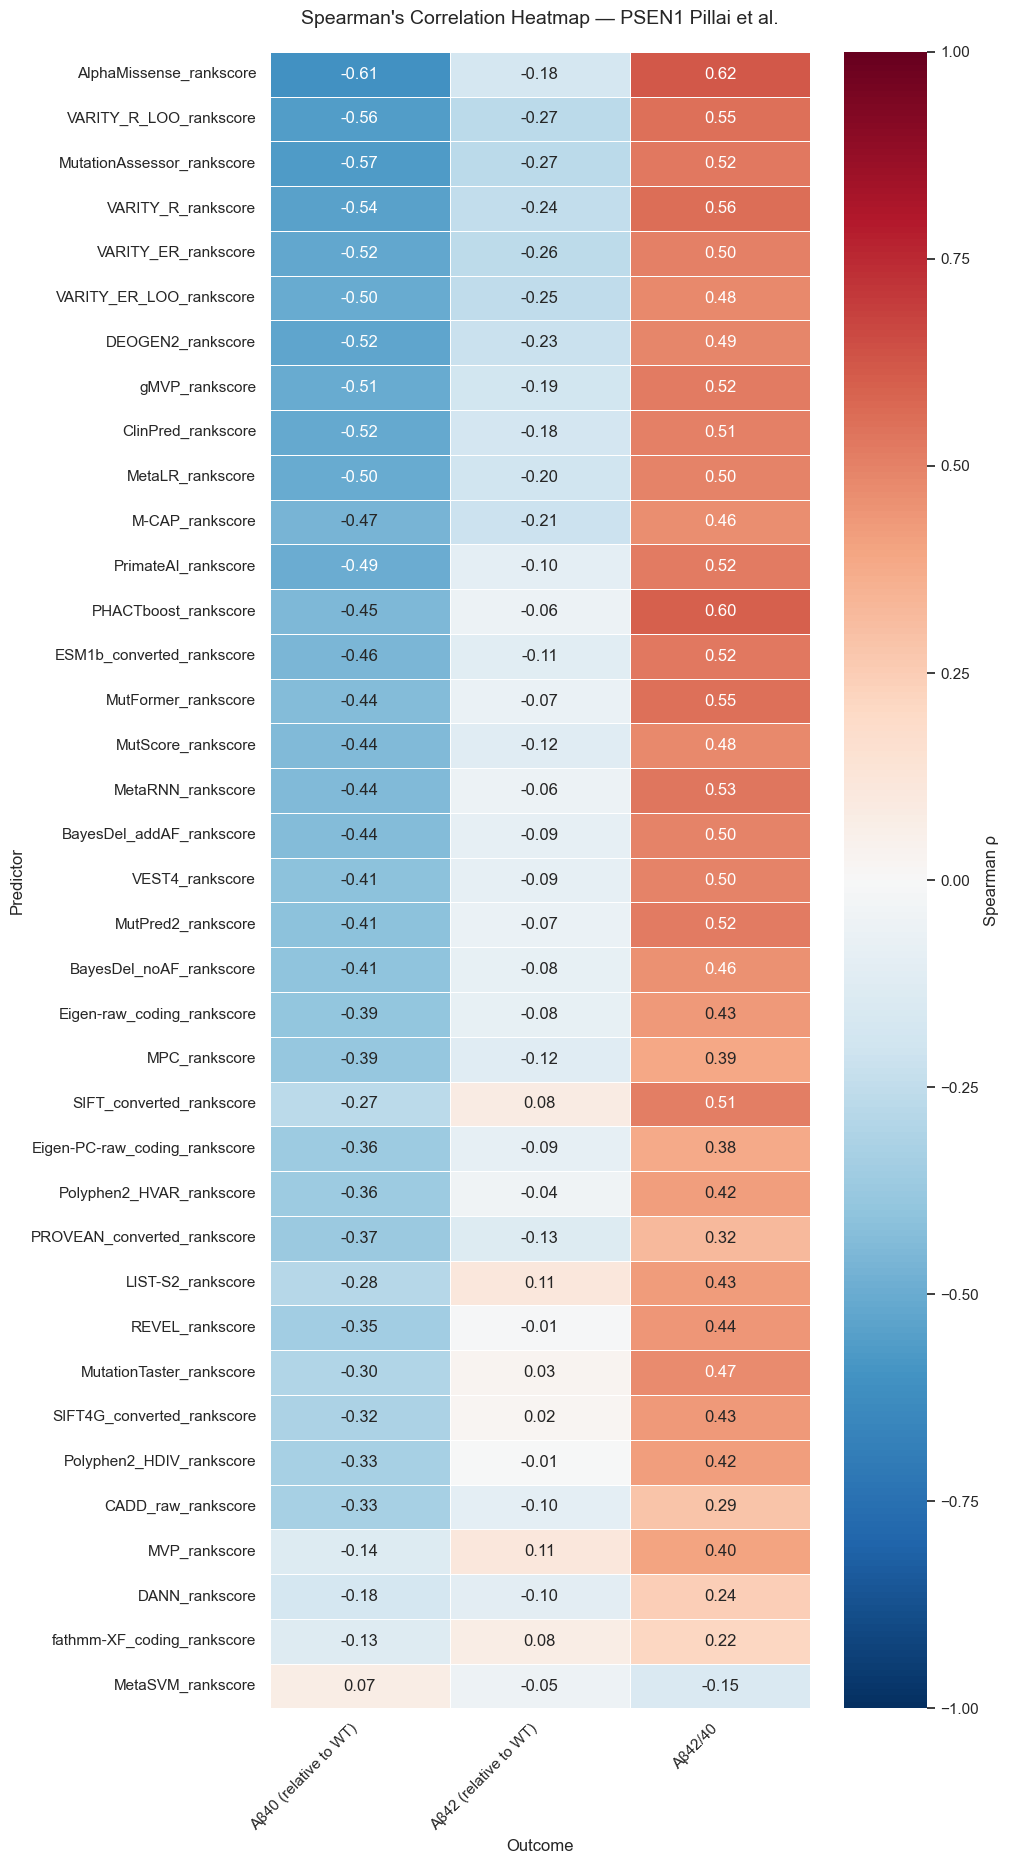

In [15]:
# --- 🔟 Plot Heatmap ---
sns.set(style="white", font_scale=1.0)
fig, ax = plt.subplots(figsize=(10, 0.4 * len(predictors) + 4))

sns.heatmap(
    rho_matrix,
    cmap="RdBu_r",
    vmin=-1, vmax=1,
    annot=True, fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Spearman ρ"},
    ax=ax
)

ax.set_title(HEATMAP_TITLE, fontsize=14, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

In [16]:
# --- 1️⃣1️⃣ Save Heatmap ---
output_fig = f"../figures/{OUTPUT_PREFIX}_heatmap.png"
fig.savefig(output_fig, dpi=600, bbox_inches="tight", facecolor="white")
print(f"Saved heatmap → {output_fig}")

Saved heatmap → ../figures/PSEN1_Pillai_heatmap.png


In [17]:
# --- 1️⃣1️⃣ Significance Summary (p < 0.05) ---

ALPHA = 0.05

# Filter significant correlations
sig_df = corr_df[corr_df["p_value"] < ALPHA].copy()

# Add direction of effect (sign of rho)
sig_df["Direction"] = np.where(sig_df["rho"] > 0, "Positive", "Negative")

# Select and rename columns for clarity
summary_table = sig_df[
    ["Predictor", "Outcome", "p_value", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Count predictors with at least one significant outcome
n_sig_predictors = summary_table["Predictor"].nunique()
n_total_predictors = corr_df["Predictor"].nunique()

# Display results
print(f"Significant predictors (p < {ALPHA}): "
      f"{n_sig_predictors} / {n_total_predictors}")

summary_table


Significant predictors (p < 0.05): 34 / 37


,Predictor,Outcome,p_value,Direction
0,SIFT_converted_rankscore,Aβ40 (relative to WT),0.045137,Negative
74,SIFT_converted_rankscore,Aβ42/40,0.000071,Positive
1,SIFT4G_converted_rankscore,Aβ40 (relative to WT),0.017348,Negative
75,SIFT4G_converted_rankscore,Aβ42/40,0.000947,Positive
2,Polyphen2_HDIV_rankscore,Aβ40 (relative to WT),0.014201,Negative
...,...,...,...,...
106,CADD_raw_rankscore,Aβ42/40,0.033168,Positive
35,Eigen-raw_coding_rankscore,Aβ40 (relative to WT),0.002984,Negative
109,Eigen-raw_coding_rankscore,Aβ42/40,0.000974,Positive
36,Eigen-PC-raw_coding_rankscore,Aβ40 (relative to WT),0.006174,Negative


In [18]:
# --- 1️⃣2️⃣ Significant Negative Associations ---

ALPHA = 0.05

# Filter: significant p-value AND negative rho
sig_neg_df = corr_df[
    (corr_df["p_value"] < ALPHA) &
    (corr_df["rho"] < 0)
].copy()

# Add direction label (explicit)
sig_neg_df["Direction"] = "Negative"

# Select and sort relevant columns
negative_summary_table = sig_neg_df[
    ["Predictor", "Outcome", "p_value", "rho", "Direction"]
].sort_values(["Predictor", "Outcome"])

# Counts
n_neg_pairs = len(negative_summary_table)
n_neg_predictors = negative_summary_table["Predictor"].nunique()

negative_summary_table


,Predictor,Outcome,p_value,rho,Direction
0,SIFT_converted_rankscore,Aβ40 (relative to WT),4.513729e-02,-0.271277,Negative
1,SIFT4G_converted_rankscore,Aβ40 (relative to WT),1.734849e-02,-0.319690,Negative
2,Polyphen2_HDIV_rankscore,Aβ40 (relative to WT),1.420091e-02,-0.328943,Negative
3,Polyphen2_HVAR_rankscore,Aβ40 (relative to WT),6.473322e-03,-0.362870,Negative
4,MutationTaster_rankscore,Aβ40 (relative to WT),2.758476e-02,-0.297151,Negative
5,MutationAssessor_rankscore,Aβ40 (relative to WT),5.500116e-06,-0.570230,Negative
42,MutationAssessor_rankscore,Aβ42 (relative to WT),4.812280e-02,-0.267744,Negative
6,PROVEAN_converted_rankscore,Aβ40 (relative to WT),5.785856e-03,-0.367440,Negative
7,VEST4_rankscore,Aβ40 (relative to WT),1.737483e-03,-0.412768,Negative
9,MetaLR_rankscore,Aβ40 (relative to WT),9.567503e-05,-0.501606,Negative


In [19]:
# Total number of correlation tests performed
n_total_tests = len(corr_df)

print(f"Total correlation tests performed: {n_total_tests}")
print(f"Significant negative correlations (p < {ALPHA}): {n_neg_pairs}")
print(
    f"Proportion of tests with significant negative correlation: "
    f"{n_neg_pairs} / {n_total_tests} "
    f"({n_neg_pairs / n_total_tests:.1%})"
)


Total correlation tests performed: 111
Significant negative correlations (p < 0.05): 35
Proportion of tests with significant negative correlation: 35 / 111 (31.5%)
